# ライトカーブを描く

In [1]:
#module import
 
import numpy as np
import matplotlib.pyplot as plt
from SI_function import ImageReduction as IR
from SI_function import LightCurveFunction as LCF
from SI_function import normal_func

In [2]:
"""================================="""
input_list = '../WASP-43/Light/out/light_dfs.list'   #skyまで引いたデータ　時系列で並べる
reg_file = '../WASP-43/select.reg'  #
displacement_file = '../WASP-43/displacement.txt'   #ここに計算したdipslacementを格納  あるいはこれを読み込んで使用。
r_pix = 10   #重心を決定する際に使う半径 これをfalseにした場合は regionの半径を採用する。

In [3]:
#とりあえず簡単なaperture測光で
def photometry(image, x_g, y_g, radius):
    value_temp = 0.0
    for i in range(int(4*radius)): #y
        for j in range(int(4*radius)):#x
            x = int(x_g - 2*radius) + j  
            y = int(y_g - 2*radius) + i
            if normal_func.dr(x,y,x_g,y_g) < radius:
                value_temp += image[y][x]
    return value_temp

In [4]:
#開く
PATH, output_name = IR.set_PATH_name(input_list, output_file='dummy', type = 'light')
images, hdrs = IR.open_fits_multi(input_list, PATH)

In [5]:
#画像のずれを計算
displacements = LCF.calc_read_displacements(images, displacement_file)

read existing file: ../WASP-43/displacement.txt


In [6]:
circles = LCF.open_reg_circle(reg_file)

In [7]:
target = LCF.get_target(circles)

In [8]:
dates = LCF.get_hdr_date(hdrs)
label = []
date_seconds = []
for i in range(len(dates)):
    label.append(dates[i].show_date())
    date_seconds.append(dates[i].return_seconds())
    

In [27]:
flux_target = []
flux_references = []
#ターゲットオブジェクト
for i in range(len(images)):
    x_g, y_g = LCF.calc_centroid(images[i],displacements[i],circles[target], r_pix = r_pix) 
    flux_target.append(photometry(images[i], x_g, y_g,16))
    
for j in range(len(circles)):
    if j!=target:
        flux_tmp = []
        for i in range(len(images)):
            x_g, y_g  = LCF.calc_centroid(images[i],displacements[i],circles[j], r_pix = r_pix) 
            flux_tmp.append(photometry(images[i], x_g, y_g,16))
        flux_references.append(flux_tmp)

([<matplotlib.axis.XTick at 0x380ef2790>,
 [Text(902548.0, 0, '2018/3/10 10:42:28.0'),
  Text(903148.0, 0, '2018/3/10 10:52:28.0'),
  Text(903748.0, 0, '2018/3/10 11:2:28.0'),
  Text(904348.0, 0, '2018/3/10 11:12:28.0'),
  Text(904948.0, 0, '2018/3/10 11:22:28.0'),
  Text(905548.0, 0, '2018/3/10 11:32:28.0'),
  Text(906148.0, 0, '2018/3/10 11:42:28.0'),
  Text(906748.0, 0, '2018/3/10 11:52:28.0'),
  Text(907348.0, 0, '2018/3/10 12:2:28.0'),
  Text(907948.0, 0, '2018/3/10 12:12:28.0'),
  Text(908548.0, 0, '2018/3/10 12:22:28.0'),
  Text(909148.0, 0, '2018/3/10 12:32:28.0'),
  Text(909748.0, 0, '2018/3/10 12:42:28.0'),
  Text(910348.0, 0, '2018/3/10 12:52:28.0'),
  Text(910948.0, 0, '2018/3/10 13:2:28.0'),
  Text(911548.0, 0, '2018/3/10 13:12:28.0'),
  Text(912148.0, 0, '2018/3/10 13:22:28.0'),
  Text(912748.0, 0, '2018/3/10 13:32:28.0'),
  Text(913348.0, 0, '2018/3/10 13:42:28.0'),
  Text(913948.0, 0, '2018/3/10 13:52:28.0'),
  Text(914548.0, 0, '2018/3/10 14:2:28.0'),
  Text(915148.0, 

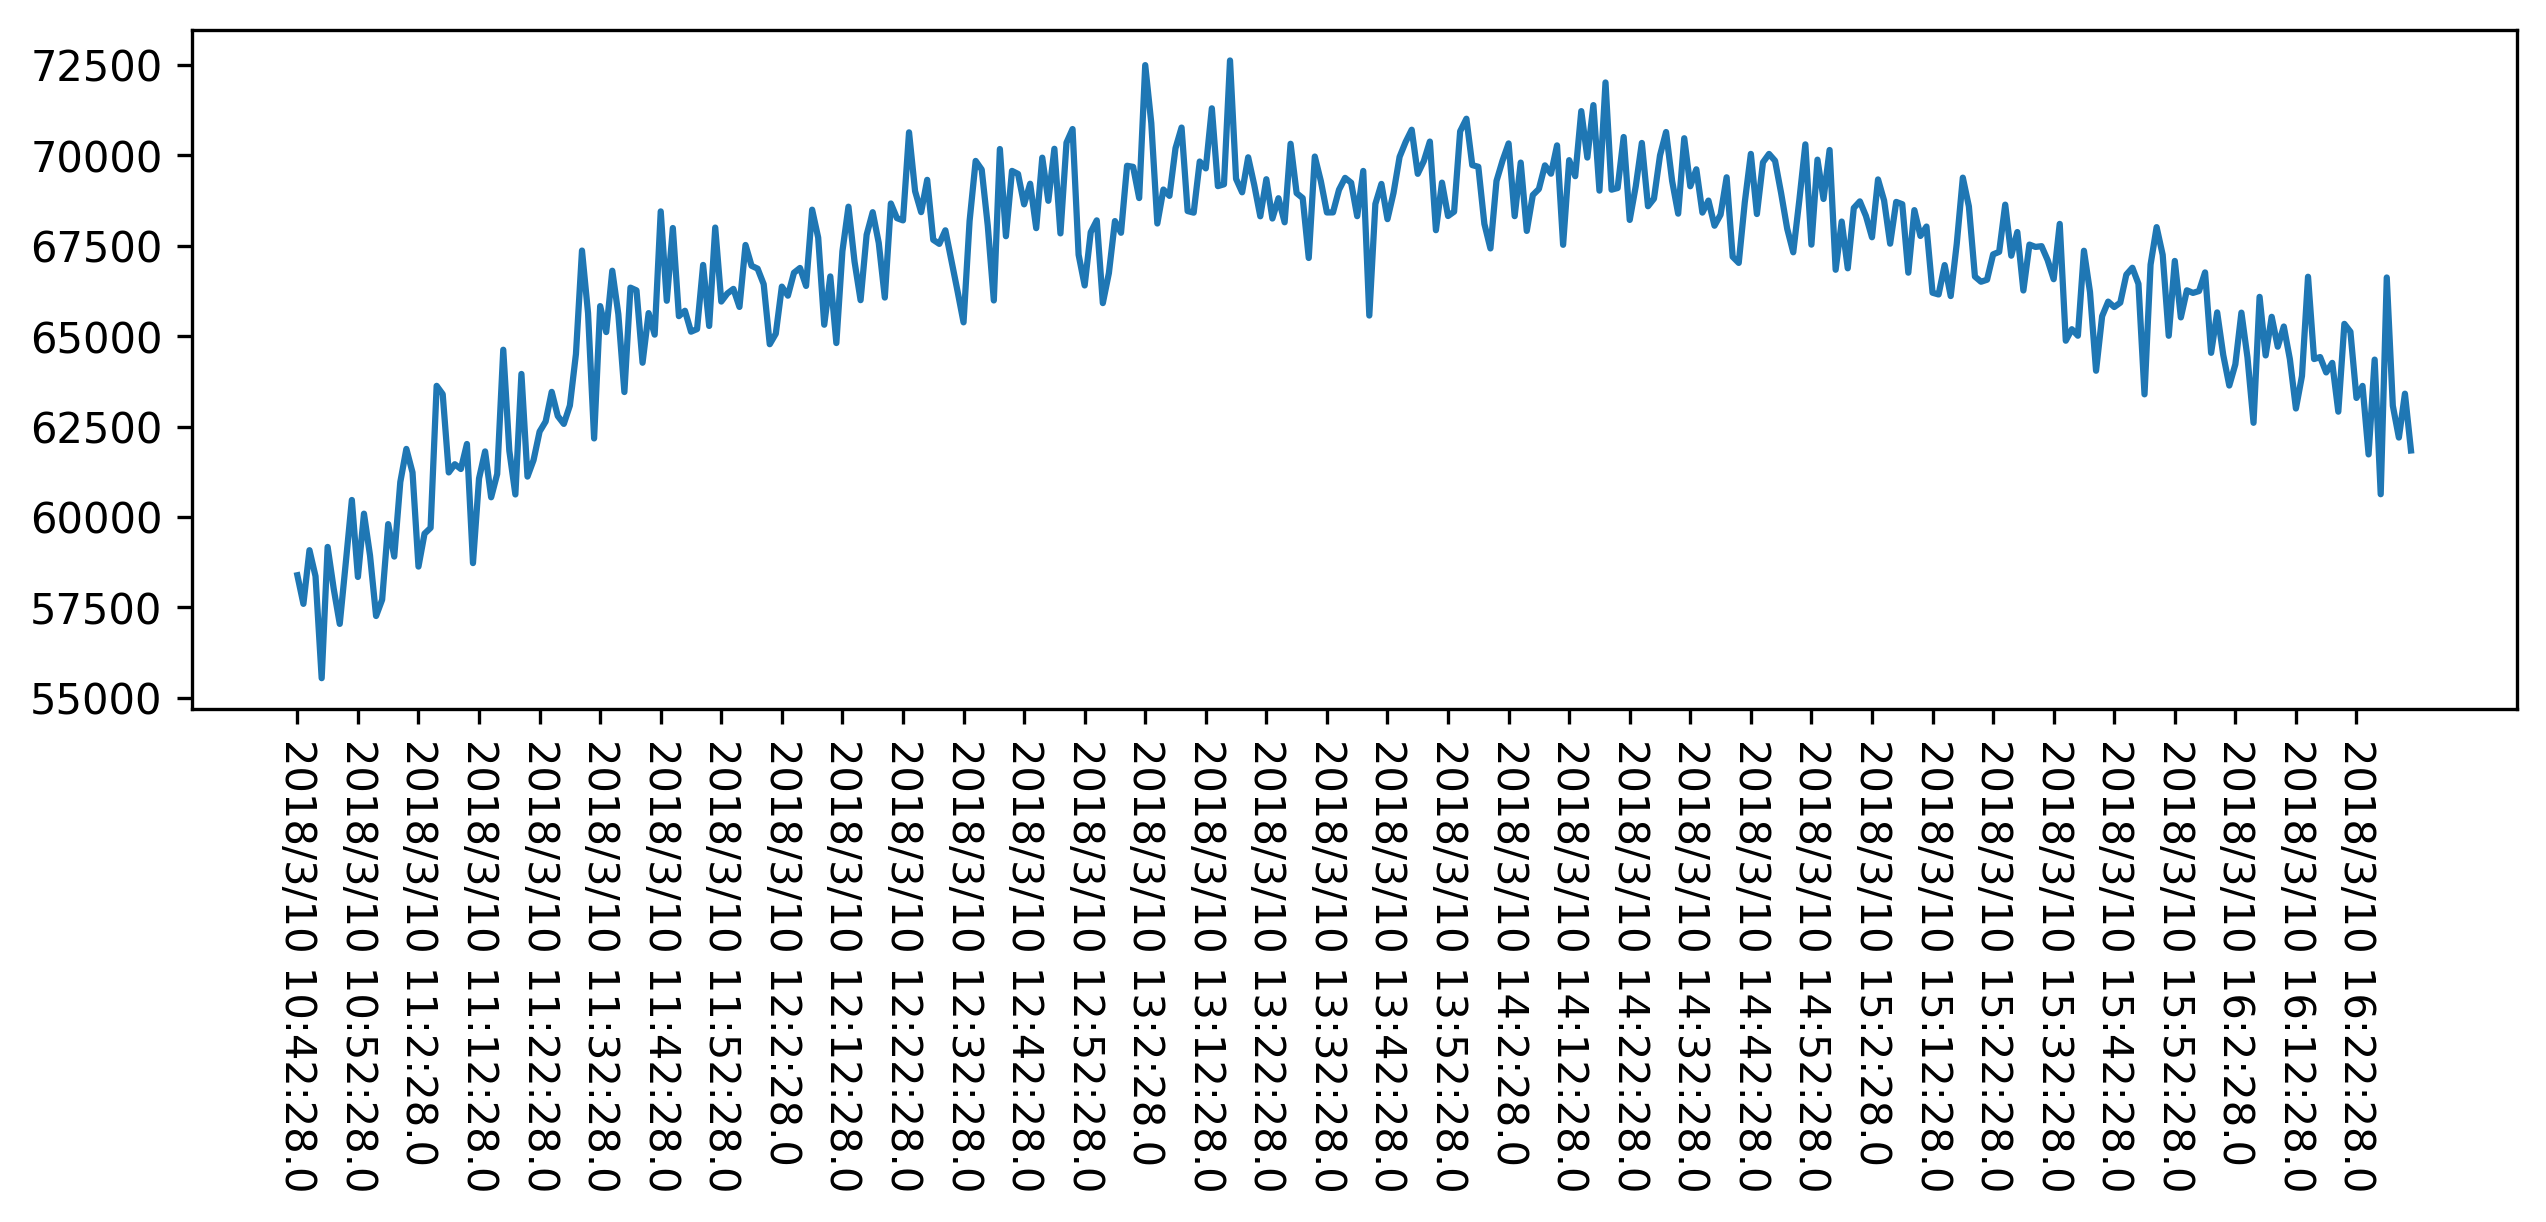

In [31]:
x_ref = np.linspace(0,100,len(flux_target))
fig=plt.figure(figsize=(10,3),dpi = 300)
fig.patch.set_facecolor('white')
#plt.plot(date_seconds, np.array(flux_target)/np.array(flux_references[1]))
plt.plot(date_seconds, np.array(flux_references[0]))
plt.xticks(date_seconds[0:len(date_seconds):10], label[0:len(date_seconds):10],rotation = -90)